In [6]:
import casadi as ca
import numpy as np

## Differential Drive Model

In [7]:
# Parameters
state_len = 3
input_len = 2

# Variables
x = ca.SX.sym('x') # state 1
y = ca.SX.sym('y') # state 2
theta = ca.SX.sym('theta') # state 3
state = ca.vertcat(x,y,theta)
v = ca.SX.sym('v') # input 1
w = ca.SX.sym('w') # input 2
input = ca.vertcat(v,w)

# ODE
x_dot = v * ca.cos(theta)
y_dot = v * ca.sin(theta)
theta_dot = w
state_dot = ca.vertcat(x_dot, y_dot, theta_dot)

# discretized ODE
dt = 0.1    
number_steps = 100
discrete_model = ca.Function('F_discrete', [state, input], [RK4(state, input, state_dot, dt, number_steps)])
print(discrete_model)

F_discrete:(i0[3],i1[2])->(o0[3]) SXFunction


## Simulation
We will no simulate the system by recursively calling the discrete time dynamics functions, starting from the initial state $s_0=(\pi/2, 0)$ with constant input $a_k=0$, $ k=0, \ldots, 200$.

In [8]:
N = 2
# preallocate array for the state trajectory
state_traj  = np.zeros((state_len, N+1))
# define (constant) action trajectory
input_traj  = 0.0*np.ones((input_len, N))
# initial state
state_traj[:, 0]  = np.array([np.pi/2, 0., 0.])

# forward simulation
for k in range(N):
    state_k = state_traj[:, k]
    input_k = input_traj[:, k]
    state_traj[:, [k+1]] = discrete_model(state_k,input_k).full()
    
print(state_traj)
print(input_traj)

[[1.57079633 1.57079633 1.57079633]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[0. 0.]
 [0. 0.]]


[[1.57079633 1.57079633 1.57079633]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[1.57079633 1.57079633 1.57079633]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[1.57079633 1.57079633 1.57079633]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


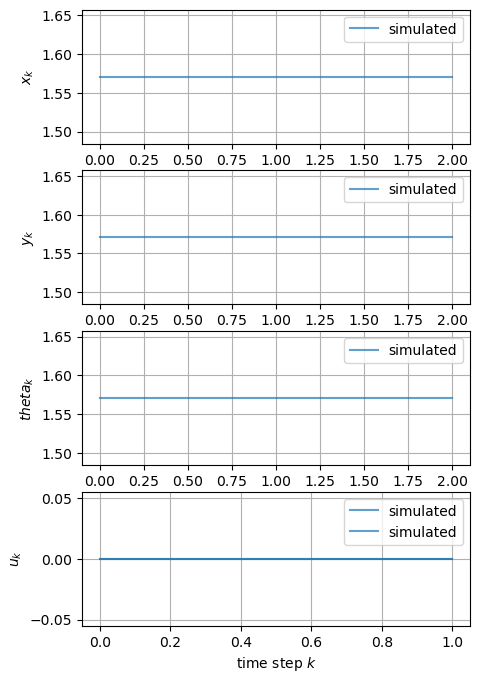

In [9]:
from utils import *
plot_trajectories(state_traj, input_traj, 'simulated',state_labels=['x','y','theta'])
plt.show()